In [84]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline
from pandas.io.json import json_normalize
import locale
locale.setlocale( locale.LC_ALL, 'en_CA.UTF-8' )

'en_CA.UTF-8'

In [62]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [63]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SECRET')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [64]:
# Select an institution for processing
INSTITUTION_ID = "ins_109508"

In [65]:
# Create client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')


### 2. Generate a public token

In [66]:
# Create public token to be exchanged for institution access token
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])


### 3. Exchange the public token for an access token

In [67]:
# Exchange public token for access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

# Store access token as variable
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [68]:
client.Accounts.get(access_token)

{'accounts': [{'account_id': 'k6jkkJ7g5RtzyM6gLAZWTkG6DKEoRBCWKZ4ox',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'qGp99NLnV6sk1oWZj4REc7zWPd6wR4hdkweRg',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'rGy99jpbV6svwZGeXoLxsDeGr8zNkmulgZr1a',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [69]:
# Get transactions for institution for specific date range
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Get transactions for date range
transaction_response = client.Transactions.get(access_token,start_date,end_date)
transaction_response


{'accounts': [{'account_id': 'k6jkkJ7g5RtzyM6gLAZWTkG6DKEoRBCWKZ4ox',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'qGp99NLnV6sk1oWZj4REc7zWPd6wR4hdkweRg',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'rGy99jpbV6svwZGeXoLxsDeGr8zNkmulgZr1a',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

### 2. Print the categories for each transaction

In [72]:
pretty_print_response(transaction_response["transactions"])


[
    {
        "account_id": "BMd99r47xoT37jLB1qemCWJRy6EZnqhwn39gZ",
        "account_owner": null,
        "amount": 500,
        "authorized_date": null,
        "category": [
            "Food and Drink",
            "Restaurants"
        ],
        "category_id": "13005000",
        "date": "2020-04-25",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "Tectra Inc",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pending": false,
    

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [103]:
# print(type(json_normalize(pretty_print_response(transaction_response['transactions']), max_level=1)))

Transaction_Date=[]
name=[]
amount=[]
category=[]

# intialise dicionary. 
data = {'Date':Transaction_Date, 'Name':name,'Amount':amount,'Category':category} 

for x in transaction_response['transactions']:
    Transaction_Date.append(x['date'])
    name.append(x['name'])
    amount.append(x['amount'])
    category.append(x['category'][0])
#     print(x)
#     break|

transactions_df = pd.DataFrame.from_dict(data) 
transactions_df



,Date,Name,Amount,Category
0,2020-04-25,Tectra Inc,500.00,Food and Drink
1,2020-04-24,AUTOMATIC PAYMENT - THANK,2078.50,Payment
2,2020-04-24,KFC,500.00,Food and Drink
3,2020-04-24,Madison Bicycle Shop,500.00,Shops
4,2020-04-15,CREDIT CARD 3333 PAYMENT *//,25.00,Payment
5,2020-04-15,Uber,5.40,Travel
6,2020-04-14,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer
7,2020-04-14,CD DEPOSIT .INITIAL.,1000.00,Transfer
8,2020-04-13,Touchstone Climbing,78.50,Recreation
9,2020-04-13,United Airlines,-500.00,Travel


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [91]:
transactions_df['Amount']=transactions_df.Amount.astype(float)
transactions_df['Date']=pd.to_datetime(transactions_df.Date).dt.strftime('%Y-%b')#('%m/%d/%Y')
transactions_df['Category']=transactions_df.Category.astype(str)
transactions_df['Name']=transactions_df.Name.astype(str)
transactions_df = transactions_df.set_index('Date')
transactions_df


,Name,Amount,Category
Date,,,
2020-Apr,Tectra Inc,500.00,Food and Drink
2020-Apr,AUTOMATIC PAYMENT - THANK,2078.50,Payment
2020-Apr,KFC,500.00,Food and Drink
2020-Apr,Madison Bicycle Shop,500.00,Shops
2020-Apr,CREDIT CARD 3333 PAYMENT *//,25.00,Payment
2020-Apr,Uber,5.40,Travel
2020-Apr,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer
2020-Apr,CD DEPOSIT .INITIAL.,1000.00,Transfer
2020-Apr,Touchstone Climbing,78.50,Recreation


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [102]:
pretty_print_response(client.Income.get(access_token)['income'])
previous_year_gross_income = client.Income.get(access_token)['income']['last_year_income_before_tax']
current_month_income = client.Income.get(access_token)['income']['income_streams'][0]['monthly_income']
projected_yearly_income = client.Income.get(access_token)['income']['projected_yearly_income_before_tax']

print(f"Previous year's gross income is: {locale.currency(previous_year_gross_income,grouping=True)}")
print(f'Current monthly income is: {locale.currency(current_month_income,grouping=True)}')
print(f'Projected yearly gross income is:{locale.currency(projected_yearly_income,grouping=True)}')

{
    "income_streams": [
        {
            "confidence": 0.99,
            "days": 690,
            "monthly_income": 500,
            "name": "UNITED AIRLINES"
        }
    ],
    "last_year_income": 6000,
    "last_year_income_before_tax": 7285,
    "max_number_of_overlapping_income_streams": 1,
    "number_of_income_streams": 1,
    "projected_yearly_income": 6085,
    "projected_yearly_income_before_tax": 7389
}
Previous year's gross income is: $7,285.00
Current monthly income is: $500.00
Projected yearly gross income is:$7,389.00


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [93]:
category_sum = transactions_df.groupby('Category').Amount.sum()
category_sum

Category
Food and Drink     3817.19
Payment            6310.50
Recreation          235.50
Shops              1500.00
Transfer          20537.34
Travel               35.19
Name: Amount, dtype: float64

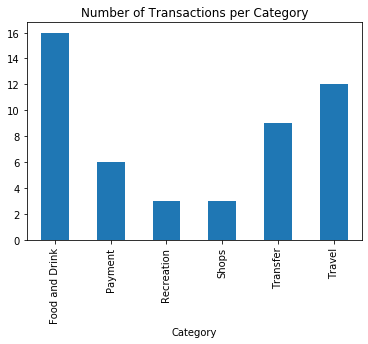

In [94]:
category_count = transactions_df.groupby('Category').Name.count()
category_count.plot(kind='bar', title='Number of Transactions per Category');

### Calculate the expenses per month

In [101]:
monthly_exp = transactions_df.groupby('Date').Amount.sum()
monthly_exp.sort_index()

Date
2020-Apr    10138.91
2020-Feb    10145.24
2020-Jan     1006.33
2020-Mar    11145.24
Name: Amount, dtype: float64